# IMPORT LIBRARIES

In [124]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# IMPORT DATA

In [2]:
customer_data=pd.read_csv("olist_customers_dataset.csv")
geological_data=pd.read_csv("olist_geolocation_dataset.csv")
review_data=pd.read_csv("olist_order_reviews_dataset.csv")
seller_data=pd.read_csv("olist_sellers_dataset.csv")
product_data=pd.read_csv("olist_products_dataset.csv")
orders_data=pd.read_csv("olist_orders_dataset.csv")
order_item=pd.read_csv("olist_order_items_dataset.csv")
payment_data=pd.read_csv("olist_order_payments_dataset.csv")

# DATA CLEANING

In [3]:
geological_data.drop(["geolocation_lat", "geolocation_lng"], axis=1, inplace=True)# I don't think these attributes are necessary
geological_data

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
2,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP
...,...,...,...
1000158,99950,tapejara,RS
1000159,99900,getulio vargas,RS
1000160,99950,tapejara,RS
1000161,99980,david canabarro,RS


In [4]:
product_data.drop(["product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"],axis=1,inplace=True)

In [5]:
product_data

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [9]:
customer_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
customer_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
payment_data

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [10]:
order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [11]:
orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


# EDA

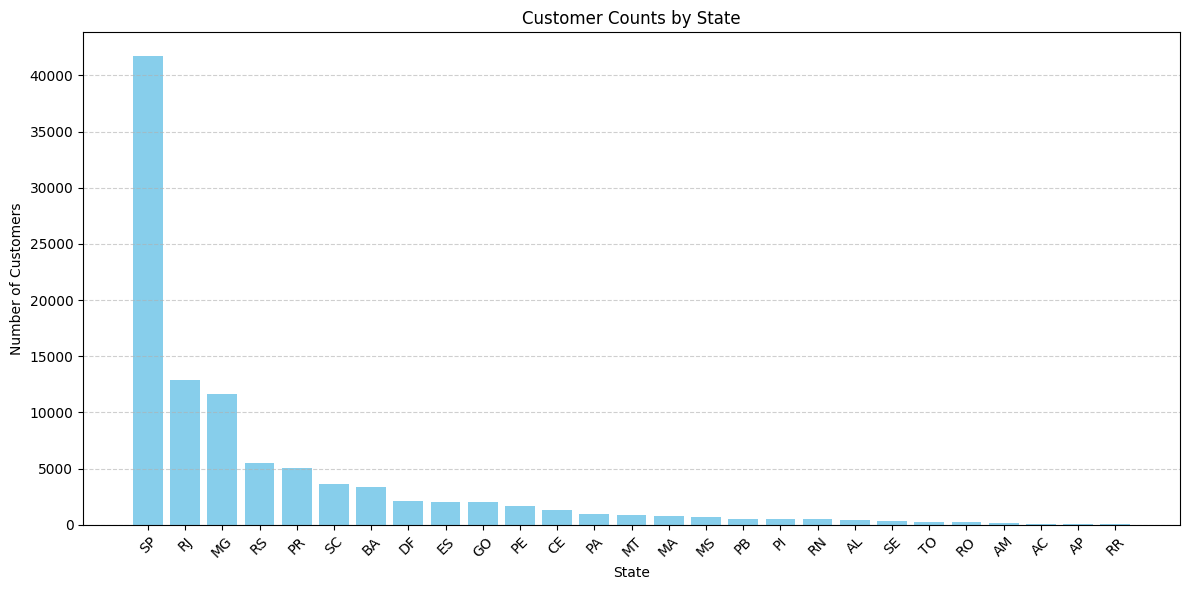

In [12]:
customer_count_by_state = customer_data['customer_state'].value_counts().reset_index()


customer_count_by_state.columns = ['State', 'Customer Count']

plt.figure(figsize=(12, 6))
plt.bar(customer_count_by_state['State'], customer_count_by_state['Customer Count'], color='skyblue')
plt.title('Customer Counts by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [13]:
# the above chart shows that the company have their majority customers from sao paulo

In [14]:
orders_data
cust_order_data=pd.merge(customer_data,orders_data,on="customer_id",how="inner")

In [15]:
cust_order_data.dtypes

customer_id                      object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [17]:
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_columns:
    cust_order_data[col] = pd.to_datetime(cust_order_data[col])

In [18]:
cust_order_data["days_to_delivery"]=(cust_order_data["order_delivered_customer_date"]-cust_order_data["order_purchase_timestamp"]).dt.days

In [20]:
# THE ABOVE CODE IS TO FIND THE DAYS TAKEN FOR DELIVERY 

In [19]:
cust_order_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_to_delivery
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,6.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,7.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,30.0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,12.0


# what is the average delivery time to each state?

In [28]:
delivery_data = cust_order_data[['customer_state', 'days_to_delivery']]
average_delivery_days = delivery_data.groupby('customer_state')['days_to_delivery'].mean().reset_index()

average_delivery_days.columns = ['customer_state', 'average_delivery_days']
average_delivery_days['average_delivery_days'] = average_delivery_days['average_delivery_days'].round()



In [29]:
average_delivery_days

,customer_state,average_delivery_days
0,AC,21.0
1,AL,24.0
2,AM,26.0
3,AP,27.0
4,BA,19.0
5,CE,21.0
6,DF,13.0
7,ES,15.0
8,GO,15.0
9,MA,21.0


In [30]:
average_delivery_days = average_delivery_days.sort_values(by='average_delivery_days', ascending=False)

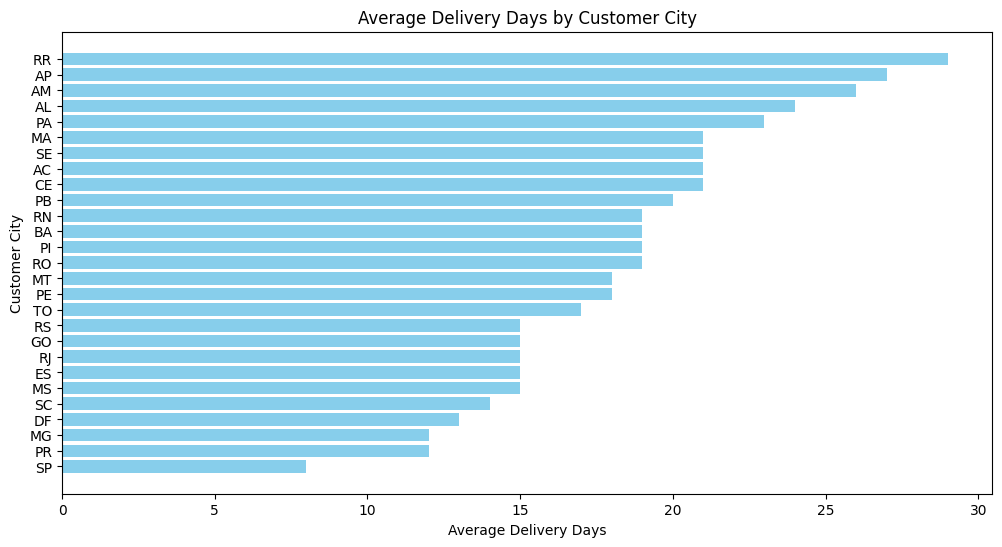

In [31]:
plt.figure(figsize=(12, 6))
plt.barh(average_delivery_days['customer_state'], average_delivery_days['average_delivery_days'], color='skyblue')
plt.xlabel('Average Delivery Days')
plt.ylabel('Customer City')
plt.title('Average Delivery Days by Customer City')
plt.gca().invert_yaxis()  
plt.show()

### So more customers are from sao paulo might be because the delivery time is less

In [32]:
geological_data[geological_data["geolocation_state"]=="RR"]

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
777226,69313,boa vista,RR
777227,69306,boa vista,RR
777228,69310,boa vista,RR
777229,69314,boa vista,RR
777230,69301,boa vista,RR
...,...,...,...
777867,69316,boa vista,RR
777868,69378,caroebe,RR
777869,69309,boa vista,RR
777870,69373,rorainopolis,RR


In [33]:
geological_data[geological_data["geolocation_state"]=="AP"]

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
774255,68901,macapa,AP
774256,68900,macapa,AP
774257,68948,serra do navio,AP
774258,68904,macapa,AP
774259,68920,laranjal do jari,AP
...,...,...,...
775103,68901,macapa,AP
775104,68900,macapa,AP
775105,68928,santana,AP
775106,68901,macapa,AP


## Delivery time is more when we condider these cities . So it might be the reason the company have less customers from these region

# Loyal Customers

### For this we can analyse the rfm score so can understand which customers are loyal, and which customers need more attention

In [48]:
data=pd.merge(cust_order_data,payment_data,on="order_id",how="inner")

In [49]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
days_to_delivery                 3132
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [60]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_to_delivery,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8.0,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16.0,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14.0,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,6.0,1,credit_card,6,88.78
103882,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,7.0,1,credit_card,3,129.06
103883,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,30.0,1,credit_card,5,56.04
103884,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,12.0,1,credit_card,2,711.07


In [50]:
data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
days_to_delivery                        float64
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
dtype: object

In [34]:
#Recency - latest purchase

In [51]:
df=data.groupby(by="customer_unique_id",as_index=False)[["order_purchase_timestamp"]].max()

In [52]:
df.columns = ["customer_unique_id","last_pur_date"]

In [53]:
recent_date=df["last_pur_date"].max()

In [54]:
df["Recency"]=df["last_pur_date"].apply(lambda x : (recent_date-x).days)

In [55]:
df.head(5)# recency gives from the recent date how many days before each customers made a purchace

,customer_unique_id,last_pur_date,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,163
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,585
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,369
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,336


In [56]:
# frequency

In [57]:
df_frequency=data.groupby(by="customer_unique_id",as_index=False)[["order_purchase_timestamp"]].count()
df_frequency.columns = ["customer_unique_id","frequency"]

In [59]:
df_frequency.sort_values(by="frequency",ascending=False)# THESE CUSTOMERS MAKE FREQUENT PURCHASES SO MORE LOYAL TO THE COMPANY

,customer_unique_id,frequency
58029,9a736b248f67d166d2fbb006bcb877c3,33
52174,8af7ac63b2efbcbd88e5b11505e8098a,29
32600,569aa12b73b5f7edeaa6f2a01603e381,26
93769,f9ae226291893fda10af7965268fb7f6,23
14015,2524dcec233c3766f2c2b22f69fd65f4,22
...,...,...
32939,57760bbba1b56ea6bbf29939e6c869ce,1
32938,5775e893a4aeb1c749e1c5afa731735d,1
32937,5775984939803dfe2ef8bad0f4c63abb,1
32936,57750363042d3964075f63e02f2a3f19,1


In [61]:
#Monetary

In [63]:
df_monetary=data.groupby(by="customer_unique_id",as_index=False)[["payment_value"]].sum()

In [64]:
df=df.merge(df_monetary,on="customer_unique_id")

In [65]:
df=df.merge(df_frequency,on="customer_unique_id")

In [67]:
df# here we have recency ,monetary and frequency value of the customers

,customer_unique_id,last_pur_date,Recency,payment_value,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,160,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,163,27.19,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,585,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,369,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,336,196.89,1
...,...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,495,2067.42,1
96091,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,310,84.58,1
96092,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,617,112.46,1
96093,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,168,133.69,1


In [68]:
# to find rfm score we need to give ranks based on these three attributes to each customers and have to take their norm value

In [69]:
df["Recency_rank"]=df["Recency"].rank(ascending=False)
df["Monetary_rank"]=df["payment_value"].rank(ascending=False)
df["Freq_rank"]=df["frequency"].rank(ascending=False)

In [70]:
df

,customer_unique_id,last_pur_date,Recency,payment_value,frequency,Recency_rank,Monetary_rank,Freq_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,160,141.90,1,73190.5,35283.5,50912.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,163,27.19,1,72184.5,94008.5,50912.5
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,585,86.22,1,3566.0,58313.5,50912.5
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,369,43.62,1,27885.5,84375.0,50912.5
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,336,196.89,1,32753.0,21320.5,50912.5
...,...,...,...,...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,495,2067.42,1,12019.0,182.0,50912.5
96091,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,310,84.58,1,40225.5,59227.0,50912.5
96092,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,617,112.46,1,1475.0,46351.5,50912.5
96093,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,168,133.69,1,70892.0,38221.5,50912.5


In [73]:
df.sort_values(by="Monetary_rank")# here we can find the customers who spend more money

,customer_unique_id,last_pur_date,Recency,payment_value,frequency,Recency_rank,Monetary_rank,Freq_rank
3826,0a0a92112bd4c708ca5fde585afaa872,2017-09-29 15:24:52,383,13664.08,1,25919.0,1.0,50912.5
26456,46450c74a0d8c5ca9395da1daac6c120,2018-08-17 20:06:36,60,9553.02,3,94514.0,2.0,651.5
81961,da122df9eeddfedc1dc1f5349a1a690c,2017-04-01 15:58:41,564,7571.63,2,5311.5,3.0,3329.0
44447,763c8b1c9c68a0229c42c9fc6f662b93,2018-07-15 14:49:44,94,7274.88,1,85636.0,4.0,50912.5
82807,dc4802a71eae9be1dd28f5d788ceb526,2017-02-12 20:37:36,611,6929.31,1,1910.0,5.0,50912.5
...,...,...,...,...,...,...,...,...
67387,b33336f46234b24a613ad9064d13106d,2018-06-21 20:29:25,117,10.89,1,81712.5,96091.0,50912.5
71051,bd06ce0e06ad77a7f681f1a4960a3cc6,2017-09-13 19:13:20,398,10.07,1,23864.5,96092.0,50912.5
18643,317cfc692e3f86c45c95697c61c853a6,2018-08-25 21:20:50,52,9.59,2,95885.0,96093.0,3329.0
56518,968fac81e2c44fb6c1e3ac2a45e6a102,2018-09-03 14:14:25,44,0.00,1,96079.5,96094.5,50912.5


In [75]:
df["norm_Monitery"]=(df["Monetary_rank"]/df["Monetary_rank"].max())
df["norm_Freq"]=(df["Freq_rank"]/df["Freq_rank"].max())
df["norm_Recency"]=(df["Recency_rank"]/df["Recency_rank"].max())

In [76]:
df=df[["customer_unique_id","norm_Monitery","norm_Freq","norm_Recency"]]

# Calculation the Rfm Score

#### Recency score x Recency weight) + (Frequency score x Frequency weight) + (Monetary score x Monetary weight)

In [82]:
df["RFM"]=(df["norm_Recency"]*0.01)+(df["norm_Freq"]*5)+(df["norm_Monitery"]*0.1)# more importance to the money spend 
import warnings
warnings.filterwarnings("ignore")

In [83]:
df

,customer_unique_id,norm_Monitery,norm_Freq,norm_Recency,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,0.367175,1.0,0.761651,5.044334
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.978292,1.0,0.751182,5.105341
2,0000f46a3911fa3c0805444483337064,0.606835,1.0,0.037109,5.061055
3,0000f6ccb0745a6a4b88665a16c9f078,0.878042,1.0,0.290188,5.090706
4,0004aac84e0df4da2b147fca70cf8255,0.221870,1.0,0.340842,5.025595
...,...,...,...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,0.001894,1.0,0.125075,5.001440
96091,fffea47cd6d3cc0a88bd621562a9d061,0.616341,1.0,0.418604,5.065820
96092,ffff371b4d645b6ecea244b27531430a,0.482353,1.0,0.015349,5.048389
96093,ffff5962728ec6157033ef9805bacc48,0.397749,1.0,0.737732,5.047152


In [84]:
df.sort_values(by="RFM")

,customer_unique_id,norm_Monitery,norm_Freq,norm_Recency,RFM
73921,c4b224d2c784bae11ae98b6ae9f2454c,0.023123,0.000206,0.111567,0.004459
93769,f9ae226291893fda10af7965268fb7f6,0.043639,0.000079,0.037760,0.005134
52174,8af7ac63b2efbcbd88e5b11505e8098a,0.053177,0.000039,0.069093,0.006205
41127,6d443b75cff956bb73dce7385033e266,0.028930,0.000422,0.235060,0.007355
50191,85963fd37bfd387aa6d915d8a1065486,0.016224,0.000422,0.553294,0.009267
...,...,...,...,...,...
20800,373b58bc6a02d3603399480b5a9ae434,0.999100,1.000000,0.998533,5.109895
75998,ca36d819c1759cdb6257fef0bb5d362d,0.999527,1.000000,0.999646,5.109949
12791,21dbe8eabd00b34492a939c540e2b1a7,0.999693,1.000000,0.999646,5.109966
29977,4fa4365000c7090fcb8cad5713c6d3db,1.000000,1.000000,0.999209,5.109992


In [87]:
data[data["customer_unique_id"]=="c4b224d2c784bae11ae98b6ae9f2454c"]["payment_value"].sum()# customer who spend the highest amount


740.76

In [90]:
data[data["customer_unique_id"]=="f9ae226291893fda10af7965268fb7f6"]["payment_value"].sum()# 2 highest

521.0700000000002

In [93]:
data[data["customer_unique_id"]=="ca36d819c1759cdb6257fef0bb5d362d"]["payment_value"].sum() # least amount

14.89

# 2.MODEL BUILDING

# feature engineering

In [140]:
orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_to_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0


In [141]:
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_columns:
    orders_data[col] = pd.to_datetime(orders_data[col])

In [142]:
orders_data["days_to_delivery"]=(orders_data["order_delivered_customer_date"]-orders_data["order_purchase_timestamp"]).dt.days

In [143]:
order_merge=pd.merge(orders_data,order_item,on="order_id",how="inner")

In [144]:
order_merge.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
days_to_delivery                        float64
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
dtype: object

In [145]:
order_merge["shipping_limit_date"]=pd.to_datetime(order_merge["shipping_limit_date"])

In [146]:
order_merge["days_for_shipment"]=(order_merge["shipping_limit_date"]-order_merge["order_purchase_timestamp"]).dt.days # how many days for shipment

In [147]:
order_merge.drop(["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date","shipping_limit_date"],axis=1,inplace=True)

In [148]:
order_merge.isna().sum()

order_id                0
customer_id             0
order_status            0
days_to_delivery     2454
order_item_id           0
product_id              0
seller_id               0
price                   0
freight_value           0
days_for_shipment       0
dtype: int64

In [149]:
order_merge.dropna(inplace=True)

In [150]:
merged_df = pd.merge(customer_data, order_merge, on='customer_id', how='inner')

In [151]:
merged_df = pd.merge(merged_df, payment_data, on='order_id', how='inner')

In [152]:
merged_df.dtypes

customer_id                  object
customer_unique_id           object
customer_zip_code_prefix      int64
customer_city                object
customer_state               object
order_id                     object
order_status                 object
days_to_delivery            float64
order_item_id                 int64
product_id                   object
seller_id                    object
price                       float64
freight_value               float64
days_for_shipment             int64
payment_sequential            int64
payment_type                 object
payment_installments          int64
payment_value               float64
dtype: object

In [153]:
correlation_matrix = merged_df.corr()

In [154]:
correlation_matrix

,customer_zip_code_prefix,days_to_delivery,order_item_id,price,freight_value,days_for_shipment,payment_sequential,payment_installments,payment_value
customer_zip_code_prefix,1.000000,0.271270,-0.000078,0.042377,0.225357,0.009681,-0.029347,0.057423,0.053735
days_to_delivery,0.271270,1.000000,-0.016173,0.061525,0.213017,0.114256,0.002442,0.042908,0.060697
order_item_id,-0.000078,-0.016173,1.000000,-0.060466,-0.030049,0.015161,-0.000685,0.073702,0.265743
price,0.042377,0.061525,-0.060466,1.000000,0.414145,0.031538,0.000391,0.278723,0.737808
freight_value,0.225357,0.213017,-0.030049,0.414145,1.000000,0.054248,0.011181,0.186223,0.372771
days_for_shipment,0.009681,0.114256,0.015161,0.031538,0.054248,1.000000,0.004893,0.011550,0.041594
payment_sequential,-0.029347,0.002442,-0.000685,0.000391,0.011181,0.004893,1.000000,-0.088029,-0.065414
payment_installments,0.057423,0.042908,0.073702,0.278723,0.186223,0.011550,-0.088029,1.000000,0.274063
payment_value,0.053735,0.060697,0.265743,0.737808,0.372771,0.041594,-0.065414,0.274063,1.000000


In [155]:
payment_corr = abs(correlation_matrix['payment_value'])
important_features_corr = payment_corr.sort_values(ascending=False)



In [156]:
important_features_corr

payment_value               1.000000
price                       0.737808
freight_value               0.372771
payment_installments        0.274063
order_item_id               0.265743
payment_sequential          0.065414
days_to_delivery            0.060697
customer_zip_code_prefix    0.053735
days_for_shipment           0.041594
Name: payment_value, dtype: float64

# here a model is bult to predict the payment value for the future purchase

### analysing the correlation table I choose the following features in X variable as input

In [115]:
from sklearn.preprocessing import LabelEncoder

In [157]:
customer_state_encoder = LabelEncoder()
merged_df["customer_state"] = customer_state_encoder.fit_transform(merged_df["customer_state"])

customer_city_encoder = LabelEncoder()
merged_df["customer_city"] = customer_city_encoder.fit_transform(merged_df["customer_city"])

payment_type_encoder = LabelEncoder()
merged_df["payment_type"] = payment_type_encoder.fit_transform(merged_df["payment_type"])

order_status_encoder = LabelEncoder()
merged_df["order_status"] = order_status_encoder.fit_transform(merged_df["order_status"])


In [158]:
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,days_to_delivery,order_item_id,product_id,seller_id,price,freight_value,days_for_shipment,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,1371,25,00e7ee1b050b8499577073aeb2a297a1,1,8.0,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,6,1,1,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,3398,25,29150127e6685892b6eab3eec79f59c7,1,16.0,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,6,1,1,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,3563,25,b2059ed67ce144a36e2aa97d2c9e9ad2,1,26.0,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,17,1,1,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,2322,25,951670f92359f4fe4a63112aa7306eba,1,14.0,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,14,1,1,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,700,25,6b7d50bd145f6fc7f33cebabd7e49d0f,1,11.0,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,2,1,1,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,3563,25,6760e20addcf0121e9d58f2f1ff14298,1,6.0,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,5,1,1,6,88.78
115030,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,3741,25,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1,7.0,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,6,1,1,3,129.06
115031,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,1363,5,fed4434add09a6f332ea398efd656a5c,1,30.0,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,4,1,1,5,56.04
115032,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,764,22,e31ec91cea1ecf97797787471f98a8c2,1,12.0,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,6,1,1,2,711.07


In [159]:
X=merged_df[["customer_zip_code_prefix","customer_city","customer_state","days_to_delivery","payment_type","freight_value","days_for_shipment"]]

In [160]:
y=merged_df["payment_value"]

### Spliting the data

In [161]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

# choosing the best model

In [162]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [122]:
names=["AdaBoostRegressor","GradientBoostingRegressor","RandomForestRegressor","DecisionTreeRegressor","XGBRegressor","LGBMRegressor"]
models=[AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,DecisionTreeRegressor,XGBRegressor,LGBMRegressor]

In [138]:
for i in range(0,len(models)):
    model = models[i]()
    start = datetime.datetime.now()
    model.fit(X_train,y_train)
    end = datetime.datetime.now()
    time = end-start
    print(f"MOdel Name used is {names[i]}")
    print("Traning MAE : ",mean_absolute_error(y_train,model.predict(X_train)))
    print("Testing MAE : ",mean_absolute_error(y_test,model.predict(X_test)))
    print(f"time Taken for this {names[i]} is {time.seconds}")
    print("\n\n\n")

MOdel Name used is AdaBoostRegressor
Traning MAE :  412.4713878079259
Testing MAE :  413.0857801972408
time Taken for this AdaBoostRegressor is 2




MOdel Name used is GradientBoostingRegressor
Traning MAE :  104.42158080352588
Testing MAE :  102.88911419366805
time Taken for this GradientBoostingRegressor is 7




MOdel Name used is RandomForestRegressor
Traning MAE :  29.067414922933125
Testing MAE :  76.36258485916167
time Taken for this RandomForestRegressor is 37




MOdel Name used is DecisionTreeRegressor
Traning MAE :  0.5915188421473054
Testing MAE :  88.77101904473422
time Taken for this DecisionTreeRegressor is 0




MOdel Name used is XGBRegressor
Traning MAE :  84.21458367269878
Testing MAE :  92.70518914338555
time Taken for this XGBRegressor is 1




MOdel Name used is LGBMRegressor
Traning MAE :  98.49287985599378
Testing MAE :  99.81152163564663
time Taken for this LGBMRegressor is 0






# hyperparametric tuning to increase accuracy

In [129]:
from sklearn.model_selection import GridSearchCV

In [135]:
xgb_model=XGBRegressor()
param_grid = {
    'n_estimators': [100, 200,250],  # Number of boosting rounds
    'learning_rate': [0.01, 0.5],  # Learning rate
    'max_depth': [3, 4, 5]}
    


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)


grid_search.fit(X_train, y_train)


print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)


Best Hyperparameters:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 250}
Best Negative Mean Squared Error:  -37474.300936420186


In [163]:
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train,y_train)
print("Traning MAE : ",mean_absolute_error(y_train,best_xgb_model.predict(X_train)))
print("Testing MAE : ",mean_absolute_error(y_test,best_xgb_model.predict(X_test)))


Traning MAE :  75.29154178363872
Testing MAE :  91.03337557538457


In [164]:
import joblib

In [165]:
joblib.dump(customer_state_encoder, 'customer_state_encoder.joblib')
joblib.dump(customer_city_encoder, 'customer_city_encoder.joblib')
joblib.dump(payment_type_encoder, 'payment_type_encoder.joblib')
joblib.dump(order_status_encoder, 'order_status_encoder.joblib')
joblib.dump(best_xgb_model,'model.joblib')

['model.joblib']